In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('athlete_events.csv')
noc=pd.read_csv('noc_regions.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df=pd.merge(df,noc,on='NOC',how='left')

In [6]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [7]:
df=df[df['Season']=='Summer']

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1385)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [14]:
medal_count=pd.get_dummies(df['Medal']).replace({True:1,False:0})

C:\Users\user\AppData\Local\Temp\ipykernel_11516\3044981120.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medal_count=pd.get_dummies(df['Medal']).replace({True:1,False:0})


In [15]:
df=pd.concat([df,medal_count],axis=1)

In [16]:
df.groupby('NOC')[['Gold','Silver','Bronze']].sum().sort_values(['Gold','Silver','Bronze'],ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,VIN,0,0,0
226,VNM,0,0,0
227,YAR,0,0,0
228,YEM,0,0,0


In [17]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])

In [18]:
medal_tally=medal_tally.groupby('NOC')[['Gold','Silver','Bronze']].sum().sort_values(['Gold','Silver','Bronze'],ascending=False).reset_index()

In [19]:
medal_tally

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,VIN,0,0,0
226,VNM,0,0,0
227,YAR,0,0,0
228,YEM,0,0,0


In [20]:
medal_tally[medal_tally['NOC']=='USA']

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708


In [21]:
years=df['Year'].unique()

In [22]:
years

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

In [23]:
years=years.tolist()

In [24]:
years.sort()
years.insert(0,'Overall')

In [25]:
countries=df['region'].dropna().unique()

In [26]:
countries

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan',
       'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco', 'Israel',
       'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia', 'Ivory Coast',
       'Kenya', 'Benin', 

In [27]:
countries=countries.tolist()

In [28]:
countries.sort()
countries.insert(0,'Overall')

In [29]:
df.query('region=="India"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,0,0,0
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN,0,0,0
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN,0,0,0
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0


In [30]:
df.query("NOC == 'IND' and Year==1928")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
32490,16701,R. Burns,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 100 metres,NaN,India,NaN,0,0,0
32491,16701,R. Burns,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 200 metres,NaN,India,NaN,0,0,0
38352,19716,Dhyan Chand Bais,M,22.0,169.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
76886,39020,Michael Anthony Gateley,M,23.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
82144,41710,"William James ""Willie"" Goodsir-Cullen",M,21.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
88778,45013,James Stanton Hall,M,25.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 200 metres,NaN,India,NaN,0,0,0


In [31]:
df['Year'].unique().shape[0]-1

28

In [32]:
df['City'].unique().shape[0]

23

In [33]:
df['Name'].unique().shape[0]

116122

In [34]:
df['region'].unique().shape[0]

206

In [35]:
df['Sport'].unique().shape[0]

52

In [36]:
df['Event'].unique().shape[0]

651

In [37]:
df.groupby('Year')['region'].unique()
#type is series

Year
1896    [Greece, UK, Switzerland, USA, Germany, France...
1900    [Denmark, Germany, USA, France, Austria, Norwa...
1904    [USA, Canada, Italy, Germany, Cuba, France, UK...
1906    [Greece, Germany, UK, Finland, Italy, Denmark,...
1908    [Italy, Germany, UK, USA, Sweden, Denmark, Aus...
1912    [Finland, Norway, Sweden, Germany, UK, Luxembo...
1920    [Denmark, Finland, Norway, Egypt, UK, Sweden, ...
1924    [Finland, Norway, Bulgaria, Chile, Switzerland...
1928    [Norway, Egypt, USA, India, Switzerland, Germa...
1932    [Netherlands, USA, Belgium, France, Philippine...
1936    [Estonia, Norway, Hungary, Italy, Egypt, Japan...
1948    [Finland, Norway, Iran, Egypt, Pakistan, Monac...
1952    [Finland, Norway, Egypt, France, Pakistan, Mon...
1956    [Norway, France, Bulgaria, South Africa, Afgha...
1960    [Norway, Bulgaria, Syria, Sudan, Iraq, Pakista...
1964    [Russia, Iraq, Egypt, Tanzania, Pakistan, Swed...
1968    [Norway, Cameroon, Mexico, Sudan, Malaysia, Ni...
1972    [

In [38]:
noc_vs_y=df.groupby('Year')['region'].nunique().reset_index()

In [39]:
df.groupby('Year')['region'].unique().reset_index()['region']

0     [Greece, UK, Switzerland, USA, Germany, France...
1     [Denmark, Germany, USA, France, Austria, Norwa...
2     [USA, Canada, Italy, Germany, Cuba, France, UK...
3     [Greece, Germany, UK, Finland, Italy, Denmark,...
4     [Italy, Germany, UK, USA, Sweden, Denmark, Aus...
5     [Finland, Norway, Sweden, Germany, UK, Luxembo...
6     [Denmark, Finland, Norway, Egypt, UK, Sweden, ...
7     [Finland, Norway, Bulgaria, Chile, Switzerland...
8     [Norway, Egypt, USA, India, Switzerland, Germa...
9     [Netherlands, USA, Belgium, France, Philippine...
10    [Estonia, Norway, Hungary, Italy, Egypt, Japan...
11    [Finland, Norway, Iran, Egypt, Pakistan, Monac...
12    [Finland, Norway, Egypt, France, Pakistan, Mon...
13    [Norway, France, Bulgaria, South Africa, Afgha...
14    [Norway, Bulgaria, Syria, Sudan, Iraq, Pakista...
15    [Russia, Iraq, Egypt, Tanzania, Pakistan, Swed...
16    [Norway, Cameroon, Mexico, Sudan, Malaysia, Ni...
17    [Norway, Sudan, Nigeria, Chad, Tanzania, K

In [40]:
df.drop_duplicates(subset=['Year','region'])['Year'].value_counts().reset_index()

,Year,count
0,2016,204
1,2012,203
2,2008,202
3,2004,200
4,2000,199
5,1996,196
6,1992,168
7,1988,156
8,1984,139
9,1972,120


In [41]:
import plotly.express as px

In [42]:
fig=px.line(noc_vs_y,x='Year',y='region')
fig.show()

In [43]:
ndf=df.drop_duplicates(subset=['Year','Sport','Event'])
x=ndf.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

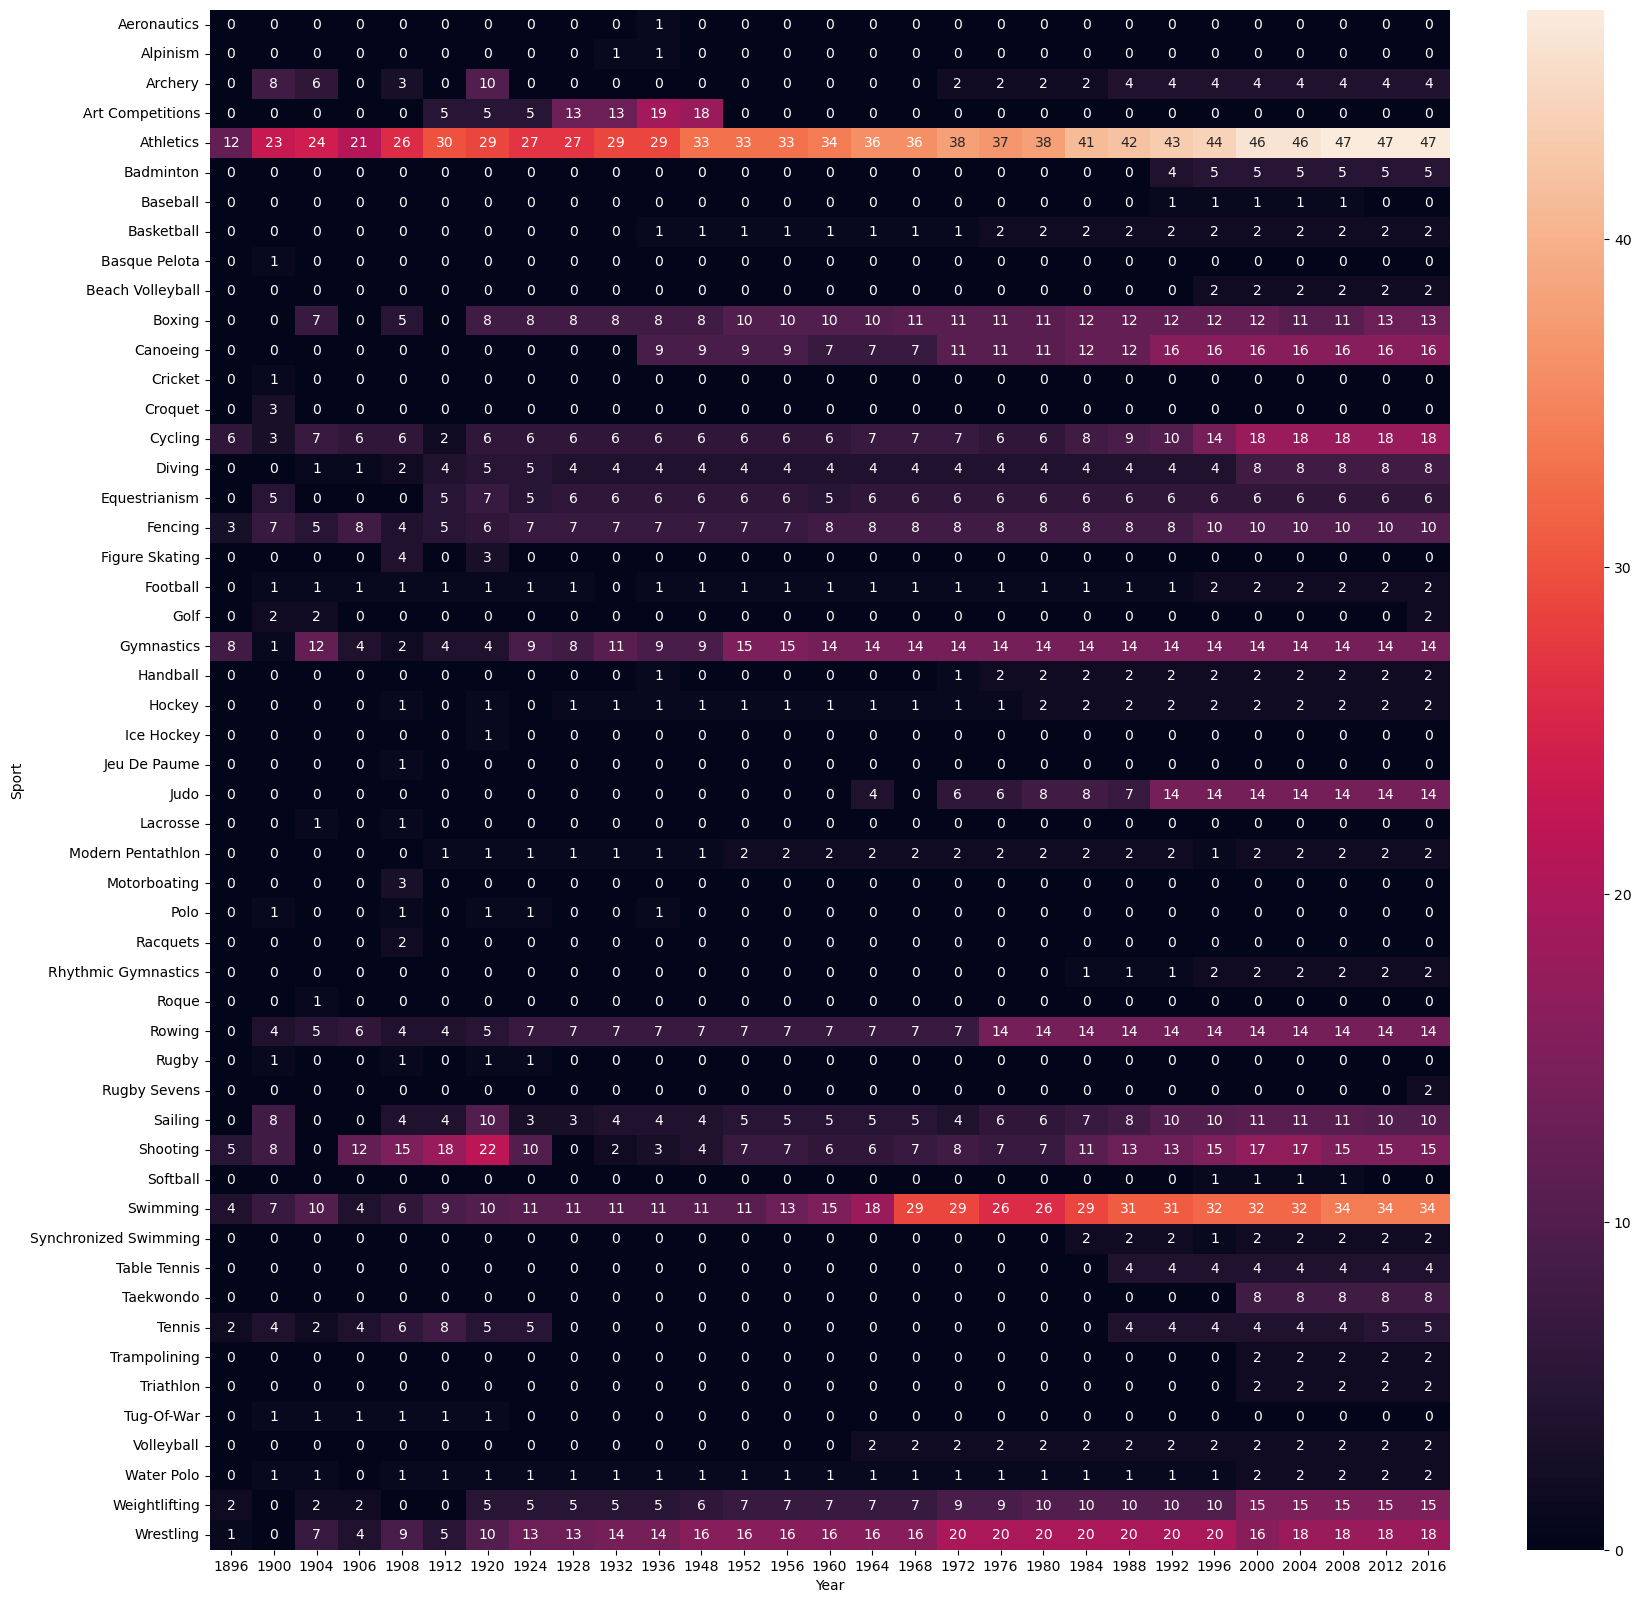

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(x,annot=True)
plt.show()

In [46]:
def goat(df,sport):
    
    #df['Total']=df['Gold']+df['Silver']+df['Bronze']
    df=df.dropna(subset=['Medal'])
    if sport!='Overall':
        df=df.query('Sport == @sport')
        x=df.groupby('Name')['Medal'].count().sort_values(ascending=False).reset_index()
        x=pd.merge(x,df[['Name','Sport','region']].drop_duplicates(),on='Name',how='left')
        greatest=x.iloc[0,:]
        #return(greatest.reset_index())
        return x
    else:
        x=df.groupby('Name')['Medal'].count().sort_values(ascending=False).reset_index()
        #print(x)
        x=pd.merge(x,df[['Name','Sport','region']].drop_duplicates(),on='Name',how='left')
        x=x[['Name','Sport','Medal','region']]
        x.rename(columns={'region':'Region'},inplace=True)
        
        return x

In [47]:
g=goat(df,'Overall')

In [48]:
type(g)

pandas.core.frame.DataFrame

In [49]:
g

,Name,Sport,Medal,Region
0,"Michael Fred Phelps, II",Swimming,28,USA
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,18,Russia
2,Nikolay Yefimovich Andrianov,Gymnastics,15,Russia
3,Edoardo Mangiarotti,Fencing,13,Italy
4,Borys Anfiyanovych Shakhlin,Gymnastics,13,Russia
...,...,...,...,...
24709,tienne Dagon,Swimming,1,Switzerland
24710,tienne Bonnes,Rugby,1,France
24711,tefan Tudor,Rowing,1,Romania
24712,tefan Tanadi,Weightlifting,1,Romania


In [50]:
g[g['Name']=='Michael Fred Phelps, II'].count()

Name      1
Sport     1
Medal     1
Region    1
dtype: int64

In [51]:
df[df['Name']=='Michael Fred Phelps, II'].count()

ID        30
Name      30
Sex       30
Age       30
Height    30
Weight    30
Team      30
NOC       30
Games     30
Year      30
Season    30
City      30
Sport     30
Event     30
Medal     28
region    30
notes      0
Bronze    30
Gold      30
Silver    30
dtype: int64

In [52]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [53]:
ndf=df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])
cwa=ndf.pivot_table(index='region',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int)

In [54]:
cwa

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,2,0,2,3,5,0,2,1,2
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Virgin Islands, British",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
cwa.loc['India'].reset_index()

,Year,India
0,1896,0
1,1900,2
2,1904,0
3,1906,0
4,1908,0
5,1912,0
6,1920,0
7,1924,0
8,1928,1
9,1932,1


In [56]:
def func(df,country):
    return df.loc[country].reset_index()

In [57]:
func(cwa,'USA')

,Year,USA
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [58]:
def top_players_per_country(df,country):
    df=df.query('region==@country')
    goat=df.groupby('Name')['Medal'].count().sort_values(ascending=False).reset_index()
    goat=pd.merge(goat,df[['Name','Sport','region']].drop_duplicates(),on='Name',how='left')
    return goat.head(10)

In [59]:
top_players_per_country(df,'India')

,Name,Medal,Sport,region
0,Udham Singh Kular,4,Hockey,India
1,Leslie Walter Claudius,4,Hockey,India
2,"Victor John ""V. J."" Peter",3,Hockey,India
3,Harbinder Singh Chimni,3,Hockey,India
4,Ranganathan Francis,3,Hockey,India
5,Richard James Allen,3,Hockey,India
6,Balbir Singh,3,Hockey,India
7,"Balbir Singh Dosanjh, Sr.",3,Hockey,India
8,Randhir Singh Gentle,3,Hockey,India
9,Prithipal Singh,3,Hockey,India


In [60]:
sports=df['Sport'].unique()

In [61]:
sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [62]:
def heat(df,country):
    df=df.query('region==@country')
    x=df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int)
    x=x.reindex(sports,fill_value=-1).astype(int)
    return x

In [63]:
heat(df,'USA')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1976,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Basketball,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,23,24,24,24,24
Judo,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,1,0,1,1,2,2
Football,0,0,23,0,0,0,0,0,0,0,...,0,0,0,0,15,13,17,17,17,0
Tug-Of-War,0,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Athletics,17,39,72,23,41,49,36,48,34,44,...,31,56,40,48,39,28,38,32,42,46
Swimming,0,0,22,1,5,7,22,26,21,16,...,55,63,45,56,60,66,65,68,68,71
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sailing,0,2,0,0,0,0,0,0,0,19,...,7,13,10,16,4,8,4,2,0,1
Gymnastics,0,0,44,0,0,0,0,1,0,20,...,1,26,1,11,11,6,19,20,10,16


In [64]:
df[df['Name']=='Dhyan Chand Bais']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
38352,19716,Dhyan Chand Bais,M,22.0,169.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
38353,19716,Dhyan Chand Bais,M,26.0,169.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
38354,19716,Dhyan Chand Bais,M,30.0,169.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [65]:
df2=df.query('region=="India"')
goat=df2.groupby('Name')['Medal'].count().sort_values(ascending=False).reset_index()
goat=pd.merge(goat,df2[['Name','Sport','region']].drop_duplicates(),on='Name',how='left')
goat.head(15)

,Name,Medal,Sport,region
0,Udham Singh Kular,4,Hockey,India
1,Leslie Walter Claudius,4,Hockey,India
2,"Victor John ""V. J."" Peter",3,Hockey,India
3,Harbinder Singh Chimni,3,Hockey,India
4,Ranganathan Francis,3,Hockey,India
5,Richard James Allen,3,Hockey,India
6,Balbir Singh,3,Hockey,India
7,"Balbir Singh Dosanjh, Sr.",3,Hockey,India
8,Randhir Singh Gentle,3,Hockey,India
9,Prithipal Singh,3,Hockey,India


In [66]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [67]:
df.shape

(221167, 20)

In [68]:
import plotly.figure_factory as ff

In [69]:
athlete_df=df.sort_values(['Year'])#.drop_duplicates(subset=['Name','region'])
debut=athlete_df.drop_duplicates(subset=['Name','region'])['Age'].dropna()
gold=athlete_df.query('Medal=="Gold"')['Age'].dropna()
silver=athlete_df.query('Medal=="Silver"')['Age'].dropna()
bronze=athlete_df.query('Medal=="Bronze"')['Age'].dropna()

In [70]:
fig=ff.create_distplot([debut,gold,silver,bronze],['Debut Age','Gold Medalist','Silver Medalist','Bronze Medallist'],show_hist=False,show_rug=False)
fig.show()

In [71]:
sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [72]:
sp=athlete_df.query('Sport=="Swimming"')['Age'].dropna()
fig=ff.create_distplot([sp],['sport'],show_hist=False,show_rug=False)
fig.show()

In [74]:
d={}
d.keys()

dict_keys([])

In [75]:
test=df.drop_duplicates(subset=['Name','region','Sport'])

In [76]:
x=test.groupby('Sport')['Name'].count()>100

In [77]:
x.shape

(52,)

In [78]:
test.shape

(117919, 20)

In [79]:
sports=df['Sport'].sort_values().unique()

In [80]:
x

Sport
Aeronautics              False
Alpinism                 False
Archery                   True
Art Competitions          True
Athletics                 True
Badminton                 True
Baseball                  True
Basketball                True
Basque Pelota            False
Beach Volleyball          True
Boxing                    True
Canoeing                  True
Cricket                  False
Croquet                  False
Cycling                   True
Diving                    True
Equestrianism             True
Fencing                   True
Figure Skating           False
Football                  True
Golf                      True
Gymnastics                True
Handball                  True
Hockey                    True
Ice Hockey               False
Jeu De Paume             False
Judo                      True
Lacrosse                 False
Modern Pentathlon         True
Motorboating             False
Polo                     False
Racquets                 False
Rh

In [81]:
sports

array(['Aeronautics', 'Alpinism', 'Archery', 'Art Competitions',
       'Athletics', 'Badminton', 'Baseball', 'Basketball',
       'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Canoeing',
       'Cricket', 'Croquet', 'Cycling', 'Diving', 'Equestrianism',
       'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics',
       'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo',
       'Lacrosse', 'Modern Pentathlon', 'Motorboating', 'Polo',
       'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby',
       'Rugby Sevens', 'Sailing', 'Shooting', 'Softball', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
       'Water Polo', 'Weightlifting', 'Wrestling'], dtype=object)

In [82]:
famous=sports[x]

In [83]:
famous

array(['Archery', 'Art Competitions', 'Athletics', 'Badminton',
       'Baseball', 'Basketball', 'Beach Volleyball', 'Boxing', 'Canoeing',
       'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Football',
       'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rhythmic Gymnastics', 'Rowing', 'Rugby',
       'Rugby Sevens', 'Sailing', 'Shooting', 'Softball', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo',
       'Weightlifting', 'Wrestling'], dtype=object)

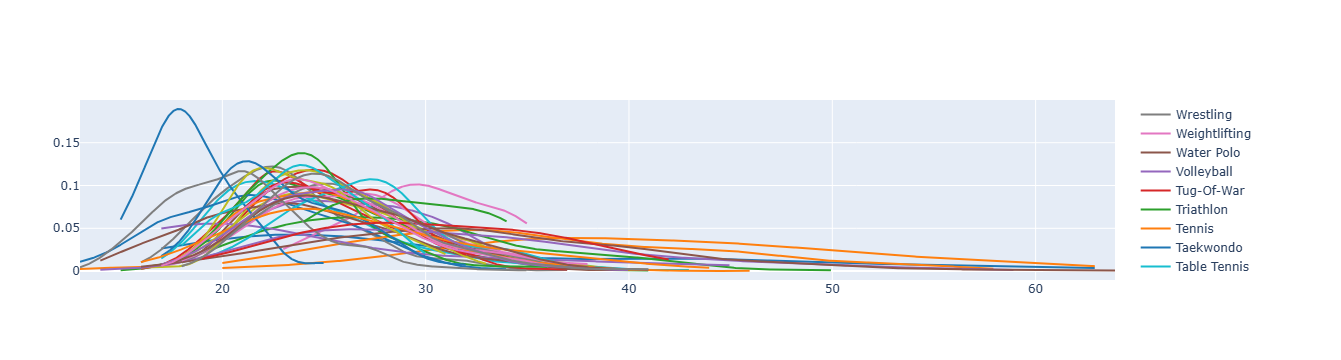

In [84]:
d={}
for i in famous:
    sp=athlete_df.query('Sport==@i and Medal=="Gold"')['Age'].dropna()
    d[i]=sp
    
fig=ff.create_distplot(list(d.values()),list(famous),show_hist=False,show_rug=False)
fig.show()
    

In [85]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [119]:
mg=df.query('Sex=="M" and Medal=="Gold"')[['Height','Weight']].dropna()
ms=df.query('Sex=="M" and Medal=="Silver"')[['Height','Weight']].dropna()
mb=df.query('Sex=="M" and Medal=="Bronze"')[['Height','Weight']].dropna()
fg=df.query('Sex=="F" and Medal=="Gold"')[['Height','Weight']].dropna()
fs=df.query('Sex=="F" and Medal=="Silver"')[['Height','Weight']].dropna()
fb=df.query('Sex=="F" and Medal=="Bronze"')[['Height','Weight']].dropna()
mnm=df.query('Sex=="M" and Medal.isna()')[['Height','Weight']].dropna()
fnm=df.query('Sex=="F" and Medal.isna()')[['Height','Weight']].dropna()

In [120]:
fnm

,Height,Weight
32,159.0,55.5
33,159.0,55.5
80,170.0,125.0
135,168.0,65.0
136,168.0,65.0
...,...,...
271055,174.0,62.0
271077,168.0,80.0
271079,168.0,80.0
271099,171.0,63.0


In [115]:
df[df['Medal'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


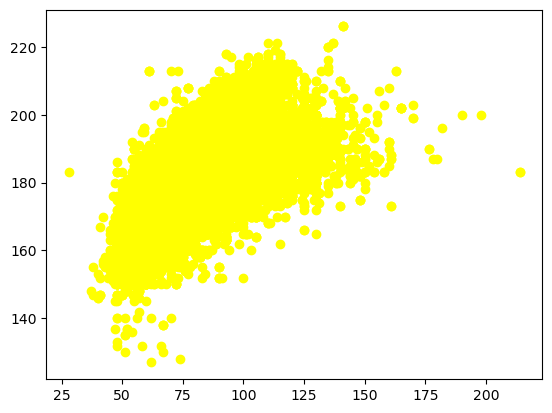

In [122]:
plt.scatter(mnm.iloc[:,1],mnm.iloc[:,0],color='yellow',marker='o')

In [136]:
ndf=df.copy()
ndf['Medal'].fillna('No Medal',inplace=True)
ndf.dropna(subset=['Height','Weight'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11516\2444402605.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [137]:
sport='Athletics'

<Axes: xlabel='Weight', ylabel='Height'>

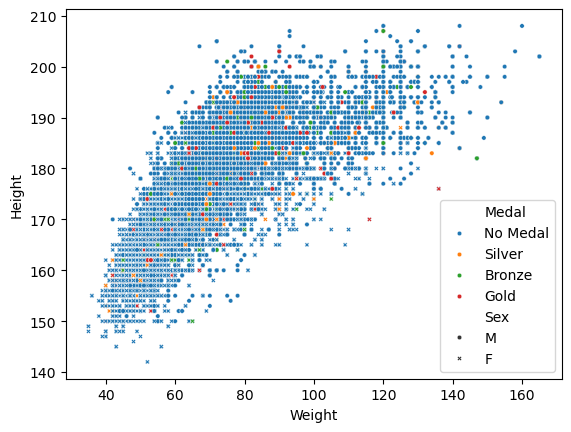

In [144]:
hw=ndf.query('Sport==@sport')
sns.scatterplot(x=hw['Weight'],y=hw['Height'],hue=hw['Medal'],style=hw['Sex'],s=10)

In [134]:
ndf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medals,China,No Medals,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medals,China,No Medals,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,No Medals,No Medals,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medals,Denmark,No Medals,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,No Medals,No Medals,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No Medals,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,No Medals,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medals,Netherlands,No Medals,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medals,Argentina,No Medals,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medals,USA,No Medals,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals,Russia,No Medals,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals,Russia,No Medals,0,0,0


In [147]:
part=df.pivot_table(index='Sex',columns='Year',values='Name',aggfunc='count')

In [152]:
part.fillna(0,inplace=True)

In [153]:
part=part.astype(int)

In [154]:
part

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,33,16,11,47,87,134,234,391,265,...,1756,2447,3543,4124,5008,5431,5546,5816,5815,6223
M,380,1865,1285,1722,3022,3953,4158,4876,4265,2200,...,5435,7007,8494,8853,8772,8390,7897,7786,7105,7465


In [158]:
part.shape

(2, 29)

In [162]:
part.columns

Index([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,
       2000, 2004, 2008, 2012, 2016],
      dtype='int64', name='Year')

In [181]:
x=pd.DataFrame(np.array(part).T)
x.rename(columns={0:'Females',1:'Males'},inplace=True)
x['Years']=part.columns

In [183]:
x

,Females,Males,Years
0,0,380,1896
1,33,1865,1900
2,16,1285,1904
3,11,1722,1906
4,47,3022,1908
5,87,3953,1912
6,134,4158,1920
7,234,4876,1924
8,391,4265,1928
9,265,2200,1932


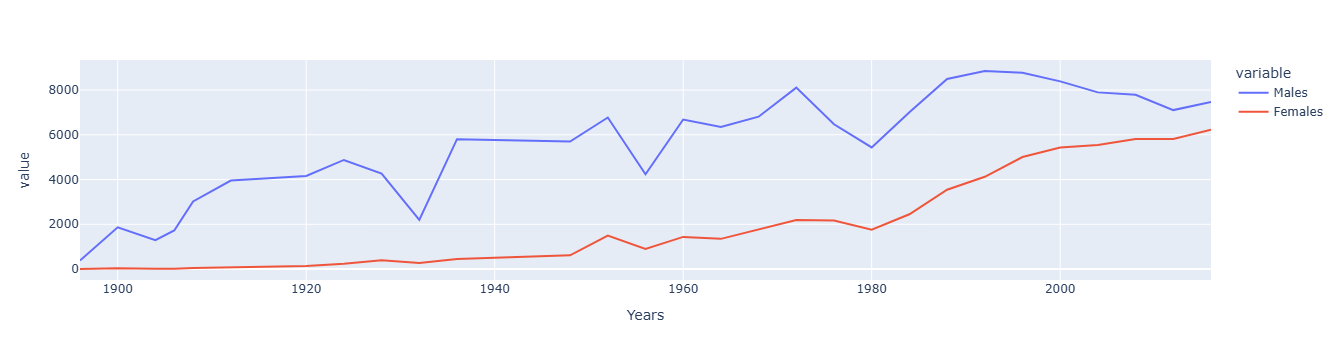

In [182]:
#px.line(x=part.columns,y=part.iloc[0,:])
px.line(x,x='Years',y=['Males','Females'])